In [2]:
import ase.vibrations
from ase.io import read
from ase.calculators.kim.kim import KIM
from ase.optimize import BFGS
from copy import deepcopy,copy
from multiprocessing import Process,Pool,Array
import numpy as np
read_array = read('FullRun.xyz',index=":") # Events from kMC 
vibrations = []
def calc_vibrations(i):
        atoms = read_array[i]

        atoms.calc =  KIM('EAM_Dynamo_PunMishin_2009_NiAl__MO_751354403791_005')
        
        vib = ase.vibrations.Vibrations(atoms,name="vib{}".format(i))

        vib.run()
        
        vib.combine()
        
        np.save('vibs{}'.format(i),vib.get_frequencies())


# if __name__ == "__main__":
#     with Pool(28) as pool:

        
#         vibrations.append(pool.map(calc_vibrations,range(1002)))
# Uncomment to run in parallel




for i in range(len(read_array)):
        calc_vibrations(i)

ModuleNotFoundError: No module named 'kimpy'

In [2]:
import numpy as np
#print(np.real(a[3]))
def vib_prod(a):
    product =0
    for i in a :
        b = np.real(i)
        if b>0:
            b = np.log(b)
            product+=b
    return product

prod= []

for i in range(len(read_array)) :
    try:
        temp = np.load('/path-to-files/vibs{}.npy'.format(i))
        prod.append(vib_prod(temp))
    except:
        continue

print(prod)

[8238.922684272531, 8232.921752200376, 8239.780860081139, 8233.10591330586, 8239.294626014786, 8232.662782593768, 8239.432793854021, 8232.35297371765, 8239.314860114295, 8232.420805362308, 8239.28416296382, 8231.922468855735, 8238.927791819415, 8231.922468855735, 8239.283994231302, 8232.419372860195, 8238.837937957185, 8232.963488398556, 8239.93466932575, 8232.973046403384, 8240.29101421317, 8233.801268015333, 8239.35261223181, 8233.92584941616, 8239.551031040173, 8232.863437748678, 8238.399370998948, 8232.863437748678, 8239.55048280746, 8232.863437748678, 8238.399377106776, 8232.863437748678, 8239.550181253358, 8232.863437748678, 8238.399383512111, 8232.863437748678, 8239.549996325459, 8232.863437748678, 8238.399389796676, 8232.863437748678, 8239.5498700966, 8232.863437748678, 8238.399395960214, 8232.863437748678, 8239.54979317976, 8232.863437748678, 8238.39940225589, 8232.863437748678, 8239.549944343431, 8232.863437748678, 8238.399408518744, 8232.863437748678, 8239.549893538253, 8232

In [3]:
from scipy.constants import c

In [4]:
rates = []
for i in range(0,1002,2):
    rates.append(np.exp(prod[i]-prod[i+1])*c*100) ## Calculate rate and convert to Hz

In [5]:
mean = np.mean(rates)/(10**12)
std = np.std(rates)/(10**12)
print(mean,np.min(rates)/(10**12),np.max(rates)/(10**12),std)

16.909372656501116 6.8176366003262325 47.20237290269965 6.096507258169113


(array([ 50., 158., 130., 106.,  26.,  11.,  15.,   4.,   0.,   1.]),
 array([6.81763660e+12, 1.08561102e+13, 1.48945839e+13, 1.89330575e+13,
        2.29715311e+13, 2.70100048e+13, 3.10484784e+13, 3.50869520e+13,
        3.91254256e+13, 4.31638993e+13, 4.72023729e+13]),
 <BarContainer object of 10 artists>)

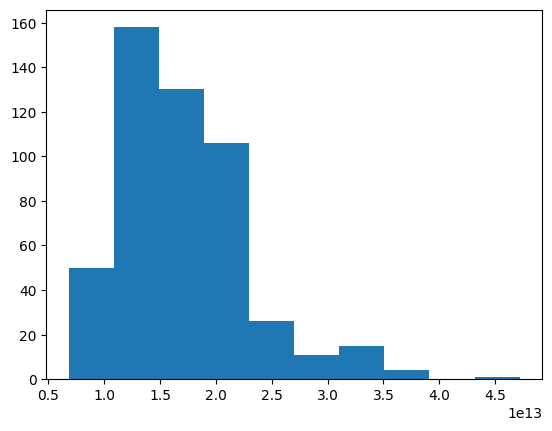

In [9]:
import matplotlib.pyplot as plt

plt.hist(rates)